In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
G = nx.DiGraph()

In [3]:
# Create Main Nodes of culture
G.add_nodes_from( [ 'culture', 'values', 'power_distance', 'indiv_collec', 'masc_fem', 'uncertainty_avoidance', 'long_term_or', 'indulgence_restraint' ] )
G.add_edges_from( [ ('values', 'culture') ] )
G.add_edges_from( [ (sub, 'values') for sub in [ 'power_distance', 'indiv_collec', 'masc_fem', 'uncertainty_avoidance', 'long_term_or', 'indulgence_restraint' ]] )

> Power Distance **nodes**

In [4]:
# Antonym Nodes of power distance
centralized = [ 'centralized', 'decentralized', 'mixed' ]
management = [ 'experience_based', 'rule_based' ]
member_type = [ 'proactive', 'order_needed' ]
subordinate_superior = [ 'pragmatic_rel', 'emotional_rel' ]
privileges = [ 'no_privileges', 'privileges' ]

# insert pointing to power distance
power_distance_antonyms = centralized + management + member_type + subordinate_superior + privileges
G.add_edges_from( [ (sub, 'power_distance') for sub in power_distance_antonyms ])

> Power Distance **terms** from research

In [5]:
# centralized
# https://bizfluent.com/about-6561176-vertical-horizontal-organizational-structure.html
# https://www.project-management-skills.com/organizational-structure-types.html
_repetitive = ['structure', 'organization', 'organizational structure']
ter_cen = [ 'boss', 'slow decision making', 'promotion', 'hierarchy',
            *[f'functional {s}' for s in _repetitive], *[f'centralized {s}' for s in _repetitive], *[f'vertical {s}' for s in _repetitive],
           ]
ter_dec = [ 'disperse', 'leader',  'projectized organization structure', *[f'small {s}' for s in _repetitive],
            *[f'horizontal {s}' for s in _repetitive], *[f'organic {s}' for s in _repetitive], *[f'simple {s}' for s in _repetitive]
          ]
ter_mix = [ *[f'hybrid {s}' for s in _repetitive], *[f'mixed {s}' for s in _repetitive], *[f'matrix {s}' for s in _repetitive]
          ]
# management
# https://www.managementstudyguide.com/management-style.htm
ter_man_experience_based = [ 'know-how', 'action', 'contact', 'involvement', 'participation', 'maturity', 'experience', 'democratic', 
    'laissez-faire'
    ]
ter_man_rule_based = [ 'guideline', 'manual', 'decree', 'order', 'regulation', 'norm', 'rule', 'boss', 
    'paternalistic', 'autocratic'
    ]
# member type
ter_mem_proactive = [ 'proactive', 'propose', 'enthusiastic', 'energetic', 'spirited', 'passionate' ]
ter_mem_order_needy = [ 'retroactive', 'reactive', 'careless', 'stative', 'shortsighted' ]
# Subordinate - superior relationship type
# /!\ not to include maybe, issue: terms need of context because they could refer tho other things
ter_rel_pragmatic = [ 'pragmatic', 'practical', 'logical', 'efficient', 'realistic', 
    'feedback' 
    ] 
ter_rel_emotional = [ 'affecting', 'exciting', 'passionate', 'sentimental', 'spontaneous', 
    'critics'
    ]

# insert pointing to respective nodes
G.add_edges_from( [ (sub, 'centralized') for sub in ter_cen ])
G.add_edges_from( [ (sub, 'decentralized') for sub in ter_dec ])
G.add_edges_from( [ (sub, 'mixed') for sub in ter_mix ])
G.add_edges_from( [ (sub, 'experience_based') for sub in ter_man_experience_based ])
G.add_edges_from( [ (sub, 'rule_based') for sub in ter_man_rule_based ])
G.add_edges_from( [ (sub, 'proactive') for sub in ter_mem_proactive ])
G.add_edges_from( [ (sub, 'order_needed') for sub in ter_mem_order_needy ])
# /!\ don't insert because direct matching can cause confusion
#G.add_edges_from( [ (sub, 'pragmatic_rel') for sub in ter_rel_pragmatic ])
#G.add_edges_from( [ (sub, 'emotional_rel') for sub in ter_rel_emotional ])

> <span style="color: tomato;">Power Distance</span> **terms** added because of presence in CVs (concatenate)

In [6]:
# TODO_ 


> <span style="color: tomato;">Individualism and Collectivism</span> **nodes**

In [7]:
interests = [ 'group_int_pur', 'employer_int_pur' ]
promotions = [ 'group_prom_based', 'skills_performance_prom_based']
employee_relationship = [ 'moral_rel', 'contractual_rel' ]
communication = [ 'indirect_comm', 'personal_comm' ]

# insert
G.add_edges_from( [ (sub, 'indiv_collec') for sub in interests + promotions + employee_relationship + communication ] )

> <span style="color: tomato;">Individualism and Collectivism</span> **terms** from research

In [8]:
# members pursue group interest
ter_group_int_pur = [ *[f'{s} interests' for s in [ 'group', 'collective', 'shared' ] ], 
    'group', 'recreational', 'leisure', 'proposal', 'discuss', 'share', 'group activities'
    ] 
# member pursue employer's interest
ter_employer_int_pur = [ 'overtime', 'project milestone', 'project goal', 'overdue', 
    *[f'employer {s}' for s in [ 'needs', 'interests', 'requirements' ] ], *[f'business {s}' for s in [ 'needs', 'interests', 'requirements' ] ]
    ]
# hiring-promotion decision considering in-group members
# /!\ needs context (ex: is it a promotion he's talking about?)
ter_group_prom_based = [ 'because it was time', 'because of needs', 'because of growth', 
    ]
# Hiring and promotion decisions are based on skills and performance
ter_skills_performance_prom_based = [ 'because of my skills', 'because of my performance', 'because of the good results', 'because of good results', 
    ]
# relationship between employees is moral
ter_moral_rel = [ 'partner\'s respect', ''
    ]
# Relationship between employees is contractual
ter_contractual_rel = [ ''
    ]
# internet and mail not used frequently
ter_indirect_comm = [ 'mail reporting', 'skype reunions', 'skype meetings', 'mail communication',
]
# mail and internet strongly used to link individuals
ter_personal_comm = [ 'presential reunions', 'group activities',
]

G.add_edges_from( [ (sub, 'group_int_pur') for sub in ter_group_int_pur ])
G.add_edges_from( [ (sub, 'employer_int_pur') for sub in ter_employer_int_pur ])
#G.add_edges_from( [ (sub, 'group_prom_based') for sub in ter_group_prom_based ])
#G.add_edges_from( [ (sub, 'skills_performance_prom_based') for sub in ter_skills_performance_prom_based ])
G.add_edges_from( [ (sub, 'moral_rel') for sub in ter_moral_rel ])
G.add_edges_from( [ (sub, 'contractual_rel') for sub in ter_contractual_rel ])
G.add_edges_from( [ (sub, 'indirect_comm') for sub in ter_indirect_comm ])
G.add_edges_from( [ (sub, 'personal_comm') for sub in ter_personal_comm ])

> <span style="color: tomato;">Individualism and Collectivism</span> **terms** from CVs

In [9]:
# TODO

> <span style="color: tomato;">Masculinity and feminity</span> **nodes**

In [10]:
type_management = [ 'intuition_mgmt', 'decisive_mgmt' ]
conflict_res = [ 'negotiated_res', 'strongest_res' ]
reward_system = [ 'equality_rew', 'equity_rew' ]
work_vision = [ 'work_to_live', 'live_to_work' ]
money_vs_leisure = [ 'leisure_over_money', 'money_over_leisure' ]

G.add_edges_from( [ (sub, 'masc_fem') for sub in type_management + conflict_res + reward_system + work_vision + money_vs_leisure ] )

> <span style="color: tomato;">Masculinity and feminity</span> **terms** from research

In [11]:
# Management based on intuition and concesus		
ter_intuition_mgmt = [ 'agile', 'scrum' ]
# Management based on decisive and agressive actions
ter_decisive_mgmt = [ 'waterfall', 'PMI' ]
# Resolution of conflicts by compromise and negotiation		
ter_negotiated_res = [ 'manage', 'negociate', 'agree' ]
# Resolution of conflicts by letting strongest win
ter_strongest_res = [ 'impose', 'require', 'order' ]
# Reward system is based on equality		
ter_equality_rew = [ 'equality' ]
# Reward system is based on equity
ter_equity_rew = [ 'equity' ]
# people work in order to live
ter_work_to_live = [ 'enjoy', 'hobbies', 'hobby', 'leisure', 'sport', '' ]
# people live in order to work
ter_live_to_work = [ 'hard work', 'workaholic', 'ambitious' ]
# more leisure time is preferred over more money
ter_leisure_over_money = [ 'travel' ] # maybe other indicators such as time of vacations?		
# more money is preferred over more leisure time
ter_money_over_leisure = [ 'ambitious' ] # maybe did he have had sevral proomtions?

G.add_edges_from( [ (sub, 'intuition_mgmt') for sub in ter_intuition_mgmt ])
G.add_edges_from( [ (sub, 'decisive_mgmt') for sub in ter_decisive_mgmt ])
G.add_edges_from( [ (sub, 'negotiated_res') for sub in ter_negotiated_res ])
G.add_edges_from( [ (sub, 'strongest_res') for sub in ter_strongest_res ])
G.add_edges_from( [ (sub, 'equality_rew') for sub in ter_equality_rew ])
G.add_edges_from( [ (sub, 'equity_rew') for sub in ter_equity_rew ])
G.add_edges_from( [ (sub, 'work_to_live') for sub in ter_work_to_live ])
G.add_edges_from( [ (sub, 'live_to_work') for sub in ter_live_to_work ])
G.add_edges_from( [ (sub, 'leisure_over_money') for sub in ter_leisure_over_money ])
G.add_edges_from( [ (sub, 'money_over_leisure') for sub in ter_money_over_leisure ])

> <span style="color: tomato;">Uncertainty Avoidance</span> **nodes**

In [12]:
rules_logic = [ 'necessary_rules', 'need_for_rules' ]
work_profile = [ 'work_on_need', 'workaholic' ]
time_meaning = [ 'time_as_orientation', 'time_is_money' ]
ambiguity_perception = [ 'ambiguity_tolerant', 'ambiguity_intolerant' ]
approaches_tendency = [ 'common_sense_approach', 'technical_approach' ]
decision_orientation = [ 'decision_process', 'decision_content' ]
entrepreneurship_view = [ 'entrepreneur_freedom', 'entrepreneur_framework' ]
motivation_type = [ 'achievement_motivation', 'job_security_motivation' ]

G.add_edges_from( [ (sub, 'uncertainty_avoidance') for sub in rules_logic + work_profile + time_meaning + ambiguity_perception + approaches_tendency + decision_orientation + entrepreneurship_view + motivation_type  ] )

> <span style="color: tomato;">Uncertainty Avoidance</span> **terms** from research

In [13]:
# No more rules than necessary		
ter_necessary_rules = [ 'iterative plan', 'agile', 'scrum', 'continuous planning' ]
# Emotional need for rules, even if they won't work
ter_need_for_rules = [ 'plan implementation', 'following the', 'according to', 'respecting the', 'PMI', 'waterfall' ]
# Work hard only when needed		
ter_work_on_need = [ 'boost', 'faced' ]
# Emotional need to be busy and unner urge to work hard
ter_workaholic = [ 'workaholic', 'hard work', 'passionate', 'ambitious' ]
# Time is a framework for orientation		
ter_time_as_orientation = [ 'agile', 'scrum' ]
# Time is money
ter_time_is_money = [ 'objectives oriented', 'goals oriented' ]
# Tolerance for ambiguity and chaos		
ter_ambiguity_tolerant = [ 'ambiguity tolerant' ]
# Need for precision and formalization
ter_ambiguity_intolerant = [ 'ambiguity intolerant', 'precise', 'formalities', 'documentation' ]
# Belief in generalists and common sense
ter_common_sense_approach = [ 'common sense', 'inuition', 'experience', 'generalist', 'management' ]		
# Belief in experts and technical solutions
ter_technical_approach = [ 'science', 'technical' ]
# Focus on decision process		
ter_decision_process = [ 'process' ]
# Focus on decision content
ter_decision_content = [ 'achieved', 'proposal' ]
# Entrepreneurs are relatively free from rules.	
ter_entrepreneur_freedom = [ 'innovation', 'creativity', 'proposal' ]	
# Entrepreneurs are constrained by existing rules.
ter_entrepreneur_framework = [ 'planning' ]
# Motivated by achievement		
ter_achievement_motivation = [ 'to achieve' ]
# Motivated by job security
ter_job_security_motivation = [ 'comfort', 'job security' ]

G.add_edges_from( [ (sub, 'necessary_rules') for sub in ter_necessary_rules ])
G.add_edges_from( [ (sub, 'need_for_rules') for sub in ter_need_for_rules ])
G.add_edges_from( [ (sub, 'work_on_need') for sub in ter_work_on_need ])
G.add_edges_from( [ (sub, 'workaholic') for sub in ter_workaholic ])
G.add_edges_from( [ (sub, 'time_as_orientation') for sub in ter_time_as_orientation ])
G.add_edges_from( [ (sub, 'time_is_money') for sub in ter_time_is_money ])
G.add_edges_from( [ (sub, 'ambiguity_tolerant') for sub in ter_ambiguity_tolerant ])
G.add_edges_from( [ (sub, 'ambiguity_intolerant') for sub in ter_ambiguity_intolerant ])
G.add_edges_from( [ (sub, 'common_sense_approach') for sub in ter_common_sense_approach ])
G.add_edges_from( [ (sub, 'technical_approach') for sub in ter_technical_approach ])

G.add_edges_from( [ (sub, 'decision_process') for sub in ter_decision_process ])
G.add_edges_from( [ (sub, 'decision_content') for sub in ter_decision_content ])
G.add_edges_from( [ (sub, 'entrepreneur_freedom') for sub in ter_entrepreneur_freedom ])
G.add_edges_from( [ (sub, 'entrepreneur_framework') for sub in ter_entrepreneur_framework ])
G.add_edges_from( [ (sub, 'achievement_motivation') for sub in ter_achievement_motivation ])
G.add_edges_from( [ (sub, 'job_security_motivation') for sub in ter_job_security_motivation ])

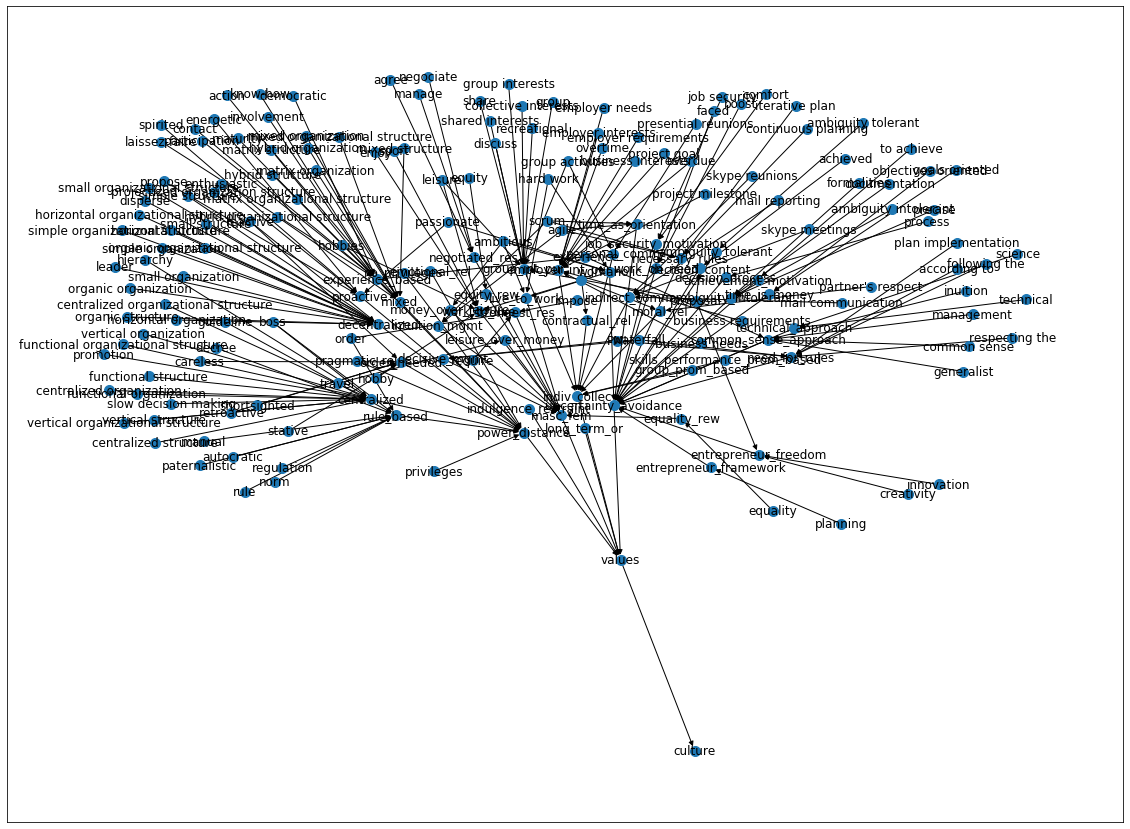

In [14]:
plt.figure(figsize=(20,15))
nx.draw_networkx(G, node_size=100)